In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
data = pd.read_csv("/Users/jiachengpeng/Desktop/MMAI 5000/Group Project Data-SFD Data-Toronto Police.csv")

Import file

In [82]:
data


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,Night,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,Night,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,Night,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,Night,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


In [83]:
data.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306
max,-79.122053,43.838273,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838273


to identify the basic statistical parameters like mean, max, min etc

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

To identify any Null value 

In [60]:
data2 =pd.unique(data["DIVISION"])


In [85]:
data1 = data["DIVISION"].nunique()
data1


17

In [86]:
data3= data.groupby(["DIVISION"])["NEIGHBOURHOOD_158"].nunique().reset_index()
print(data3)

   DIVISION  NEIGHBOURHOOD_158
0       D11                 15
1       D12                 16
2       D13                 14
3       D14                 20
4       D22                 18
5       D23                 15
6       D31                 25
7       D32                 25
8       D33                 20
9       D41                 17
10      D42                 21
11      D43                 19
12      D51                 15
13      D52                 12
14      D53                 15
15      D54                 18
16      D55                 10


In [87]:
print(data["NEIGHBOURHOOD_158"][data["DIVISION"]=="D11"].unique())
print(data["NEIGHBOURHOOD_158"][data["DIVISION"]=="D12"].unique())
print(data["NEIGHBOURHOOD_158"][data["DIVISION"]=="D51"].unique())



['Runnymede-Bloor West Village' 'High Park North'
 'Junction-Wallace Emerson' 'South Parkdale' 'Roncesvalles' 'NSA'
 'Oakridge' 'Lambton Baby Point' 'Junction Area' 'High Park-Swansea'
 'Weston-Pelham Park' 'Dufferin Grove' 'Little Portugal'
 'East End-Danforth' 'Rockcliffe-Smythe']
['Weston' 'Rockcliffe-Smythe' 'Brookhaven-Amesbury'
 'Keelesdale-Eglinton West' 'Weston-Pelham Park' 'Junction Area'
 'Humbermede' 'NSA' 'Mount Dennis' 'Beechborough-Greenbrook'
 'Yonge-Bay Corridor' 'Thistletown-Beaumond Heights' 'Rustic'
 'Pelmo Park-Humberlea' 'Maple Leaf' 'Oakdale-Beverley Heights']
['Downtown Yonge East' 'Regent Park' 'NSA' 'Moss Park'
 'North St.James Town' 'Cabbagetown-South St.James Town'
 'Rosedale-Moore Park' 'Church-Wellesley'
 'St Lawrence-East Bayfront-The Islands' 'Dorset Park' 'South Riverdale'
 'Morningside Heights' 'Yonge-St.Clair' 'Taylor-Massey' 'Thorncliffe Park']


After analyzing the neighborhoods within each division we suspect that NSA refers to objects that are "NSA"

In [88]:
print(data[data["NEIGHBOURHOOD_158"] == "NSA"])

              X    Y  OBJECTID EVENT_UNIQUE_ID                OCC_DATE   
9    -85.488744  0.0        10   GO-2004683174  2004/10/15 04:00:00+00  \
22   -85.488744  0.0        23   GO-2004591518  2004/09/03 04:00:00+00   
27   -85.488744  0.0        28   GO-2004577384  2004/07/09 04:00:00+00   
78   -85.488744  0.0        79   GO-2004120070  2004/01/03 05:00:00+00   
112  -85.488744  0.0       113   GO-2004692390  2004/10/23 04:00:00+00   
...         ...  ...       ...             ...                     ...   
2184 -85.488744  0.0      2185  GO-20134907315  2013/03/28 04:00:00+00   
2223 -85.488744  0.0      2224  GO-20135154184  2013/10/03 04:00:00+00   
2250 -85.488744  0.0      2251  GO-20135164075  2013/08/21 04:00:00+00   
2258 -85.488744  0.0      2259  GO-20135072874  2013/07/01 04:00:00+00   
2259 -85.488744  0.0      2260  GO-20134785610  2013/01/16 05:00:00+00   

      OCC_YEAR  OCC_MONTH    OCC_DOW  OCC_DOY  OCC_DAY  ...  OCC_TIME_RANGE   
9         2004    October     Fr

We have identify 64 rows for which neighbourhood is marked NSA


In [89]:
pd.set_option('display.max_rows',20)

In [90]:

data4= data.groupby(["NEIGHBOURHOOD_158"])["DIVISION"].nunique().reset_index().sort_values(by="DIVISION",ascending= False)
print(data4)

       NEIGHBOURHOOD_158  DIVISION
97                   NSA        14
153   Yonge-Bay Corridor         8
26   Clairlea-Birchmount         6
36   Downtown Yonge East         5
121               Rustic         5
..                   ...       ...
94          Mount Dennis         1
93             Moss Park         1
43      Elms-Old Rexdale         1
90      Mimico-Queensway         1
0        Agincourt North         1

[159 rows x 2 columns]


Showing Neighborhood which have multiple divisions

In [91]:
data4[data4["DIVISION"]>1]

,NEIGHBOURHOOD_158,DIVISION
97,NSA,14
153,Yonge-Bay Corridor,8
26,Clairlea-Birchmount,6
36,Downtown Yonge East,5
121,Rustic,5
...,...,...
3,Annex,2
54,Golfdale-Cedarbrae-Woburn,2
57,Harbourfront-CityPlace,2
30,Danforth,2


In [92]:
data5 = data.replace("NSA","Other")
print(data5[data5["NEIGHBOURHOOD_158"] == "NSA"])


Empty DataFrame
Columns: [X, Y, OBJECTID, EVENT_UNIQUE_ID, OCC_DATE, OCC_YEAR, OCC_MONTH, OCC_DOW, OCC_DOY, OCC_DAY, OCC_HOUR, OCC_TIME_RANGE, DIVISION, DEATH, INJURIES, HOOD_158, NEIGHBOURHOOD_158, HOOD_140, NEIGHBOURHOOD_140, LONG_WGS84, LAT_WGS84]
Index: []

[0 rows x 21 columns]


Changing "NSA" to "Other"

In [93]:
data5["D_NEIGHBOURHOOD158"]=  data5["NEIGHBOURHOOD_158"] + data5["DIVISION"]
data5.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306
max,-79.122053,43.838273,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838273


Since there are multiple divisions for each neighbourhood we will be combining DIVISION + NEIGHBOURHOOD158 to generate an additional column with unique values


data5

data5["Quarter"]=pd.cut(data5["OCC_MONTH"],["January","Februry"],labels=["Winter","Winter"])

In [94]:
data5


,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,D33,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,D14,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,D43,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,D11,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11


data5["Season"]= data5["OCC_MONTH"]
data5 = data5.replace("January","Winter")
data5 = data5.replace("February","Winter")
data5 = data5.replace("March","Spring")
data5 = data5.replace("April","Spring")
data5 = data5.replace("May","Spring")
data5 = data5.replace("June","Summer")
data5 = data5.replace("July","Summer")
data5 = data5.replace("August","Summer")
data5 = data5.replace("September","Fall")
data5 = data5.replace("October","Fall")
data5 = data5.replace("November","Fall")
data5 = data5.replace("December","Winter")

data5








In [96]:
data5["AFFECTED_PEOPLE"]=  data5["DEATH"] + data5["INJURIES"]
data5

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,D_NEIGHBOURHOOD158,AFFECTED_PEOPLE
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Woburn NorthD41,0
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,West Humber-ClairvilleD23,0
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Black CreekD31,2
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Downtown Yonge EastD51,1
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Malvern EastD42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,0,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Henry FarmD33,1
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,1,1,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Wellington PlaceD14,2
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,MorningsideD43,0
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,0,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Dufferin GroveD11,2


In [78]:
data5.describe()


,X,Y,OBJECTID,OCC_YEAR,OCC_DOY,OCC_DAY,OCC_HOUR,DEATH,INJURIES,LONG_WGS84,LAT_WGS84,AFFECTED_PEOPLE
count,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000,5707.000000
mean,-79.481115,43.244138,2854.000000,2014.460662,187.198178,15.901174,12.099527,0.122481,0.488172,-79.481115,43.244138,0.610654
std,0.640212,4.532671,1647.613324,5.468803,100.269326,8.819631,8.685588,0.349599,0.779148,0.640212,4.532671,0.839658
min,-85.488744,0.000000,1.000000,2004.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-85.488744,0.000000,0.000000
25%,-79.513346,43.676604,1427.500000,2010.000000,106.000000,8.000000,3.000000,0.000000,0.000000,-79.513346,43.676604,0.000000
50%,-79.439740,43.720796,2854.000000,2016.000000,192.000000,16.000000,15.000000,0.000000,0.000000,-79.439740,43.720796,0.000000
75%,-79.328082,43.755306,4280.500000,2019.000000,268.000000,23.000000,20.000000,0.000000,1.000000,-79.328082,43.755306,1.000000
max,-79.122053,43.838273,5707.000000,2022.000000,366.000000,31.000000,23.000000,3.000000,24.000000,-79.122053,43.838273,26.000000


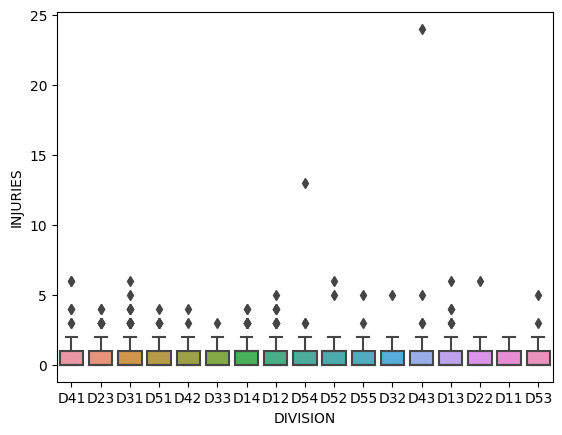

In [100]:
sns.boxplot(x="DIVISION",y="INJURIES",data=data5)
plt.show()

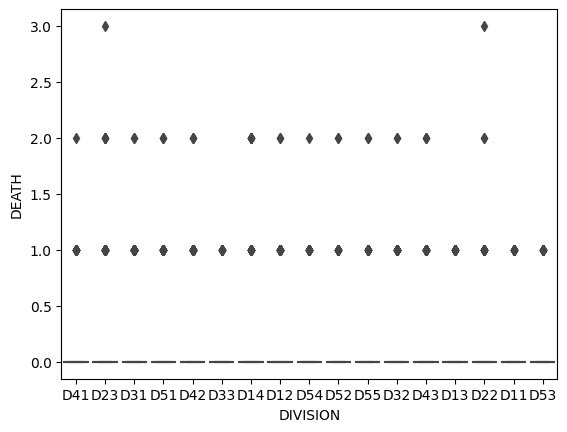

In [102]:
sns.boxplot(x="DIVISION",y="DEATH",data=data5)
plt.show()

In [111]:
data6=data5.loc[:,["INJURIES","DIVISION"]]
data6[data6["INJURIES"]>10]


,INJURIES,DIVISION
1853,24,D43
3727,13,D54


We investigated the outliers of 24 injuries and 13 injuries and found them to be factual however the inclusion of these points will skew further analysis.
Therefore we are dropping it from the data set = data6